In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=712560f70ae512a58fd4427af48ddb36


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=712560f70ae512a58fd4427af48ddb36&q=Boston


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | warmbad
Processing Record 2 of Set 13 | sao geraldo do araguaia
Processing Record 3 of Set 13 | lolua
City not found. Skipping...
Processing Record 4 of Set 13 | komyshnya
Processing Record 5 of Set 13 | roald
Processing Record 6 of Set 13 | adre
Processing Record 7 of Set 13 | vaini
Processing Record 8 of Set 13 | port elizabeth
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | kodiak
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | mataura
Processing Record 13 of Set 13 | gornopravdinsk
Processing Record 14 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 13 | acapulco
Processing Record 17 of Set 13 | arraial do cabo
Processing Record 18 of Set 13 | sur
Processing Record 19 of Set 13 | tyubuk
Processing Record 20 of Set 13 | greymouth
Processing Record 21 of Set 13 | lompoc
Processing Record 22 o

Processing Record 35 of Set 16 | debre birhan
Processing Record 36 of Set 16 | bengkulu
Processing Record 37 of Set 16 | tokur
Processing Record 38 of Set 16 | jumla
Processing Record 39 of Set 16 | viedma
Processing Record 40 of Set 16 | huilong
Processing Record 41 of Set 16 | guerrero negro
Processing Record 42 of Set 16 | adrar
Processing Record 43 of Set 16 | vanavara
Processing Record 44 of Set 16 | saldanha
Processing Record 45 of Set 16 | pacific grove
Processing Record 46 of Set 16 | aklavik
Processing Record 47 of Set 16 | tateyama
Processing Record 48 of Set 16 | si sa ket
Processing Record 49 of Set 16 | irbit
Processing Record 50 of Set 16 | ponta do sol
Processing Record 1 of Set 17 | port lincoln
Processing Record 2 of Set 17 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 17 | kruisfontein
Processing Record 4 of Set 17 | sibolga
Processing Record 5 of Set 17 | port-gentil
Processing Record 6 of Set 17 | bambous virieux
Processing Record 7 of Set 1

Processing Record 25 of Set 20 | namatanai
Processing Record 26 of Set 20 | barreirinha
Processing Record 27 of Set 20 | haapiti
Processing Record 28 of Set 20 | nianzishan
Processing Record 29 of Set 20 | ahuimanu
Processing Record 30 of Set 20 | porto velho
Processing Record 31 of Set 20 | barcelos
Processing Record 32 of Set 20 | juegang
Processing Record 33 of Set 20 | paamiut
Processing Record 34 of Set 20 | kaka
Processing Record 35 of Set 20 | almaty
Processing Record 36 of Set 20 | tazmalt
Processing Record 37 of Set 20 | augusto correa
Processing Record 38 of Set 20 | vestmannaeyjar
Processing Record 39 of Set 20 | palmer
Processing Record 40 of Set 20 | miri
Processing Record 41 of Set 20 | chebsara
Processing Record 42 of Set 20 | juneau
Processing Record 43 of Set 20 | leshukonskoye
Processing Record 44 of Set 20 | tessalit
Processing Record 45 of Set 20 | jalu
Processing Record 46 of Set 20 | baza
Processing Record 47 of Set 20 | bargal
City not found. Skipping...
Processi

Processing Record 11 of Set 24 | vila do maio
Processing Record 12 of Set 24 | assiniboia
Processing Record 13 of Set 24 | te anau
Processing Record 14 of Set 24 | carmo do rio claro
Processing Record 15 of Set 24 | flinders
Processing Record 16 of Set 24 | buchanan
Processing Record 17 of Set 24 | vero beach
Processing Record 18 of Set 24 | chongwe
Processing Record 19 of Set 24 | meiganga
Processing Record 20 of Set 24 | sabha
Processing Record 21 of Set 24 | chute-aux-outardes
Processing Record 22 of Set 24 | santa maria da vitoria
Processing Record 23 of Set 24 | egvekinot
Processing Record 24 of Set 24 | totness
Processing Record 25 of Set 24 | deh rawud
City not found. Skipping...
Processing Record 26 of Set 24 | fort myers beach
Processing Record 27 of Set 24 | saint-francois
Processing Record 28 of Set 24 | lufilufi
Processing Record 29 of Set 24 | vestmanna
Processing Record 30 of Set 24 | sasso marconi
Processing Record 31 of Set 24 | zabol
Processing Record 32 of Set 24 | na

In [14]:
len(city_data)

583

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Warmbad,-28.4500,18.7333,69.78,56,0,16.71,NA,2021-02-01 00:23:14
1,Sao Geraldo Do Araguaia,-6.4006,-48.5550,75.11,90,88,0.76,BR,2021-02-01 00:26:13
2,Komyshnya,50.1859,33.6840,25.74,97,95,3.38,UA,2021-02-01 00:26:14
3,Roald,62.5833,6.1333,28.40,93,20,6.91,NO,2021-02-01 00:22:59
4,Adre,13.4667,22.2000,65.52,25,0,10.45,TD,2021-02-01 00:26:14
5,Vaini,-21.2000,-175.2000,80.60,89,90,10.36,TO,2021-02-01 00:22:17
6,Port Elizabeth,-33.9180,25.5701,68.00,83,40,24.16,ZA,2021-02-01 00:24:04
7,Busselton,-33.6500,115.3333,70.00,67,0,8.01,AU,2021-02-01 00:22:16
8,Kodiak,57.7900,-152.4072,33.80,51,1,5.75,US,2021-02-01 00:26:15
9,Rikitea,-23.1203,-134.9692,79.43,61,25,6.96,PF,2021-02-01 00:22:21


In [52]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Warmbad,NA,2021-02-01 00:23:14,-28.4500,18.7333,69.78,56,0,16.71
1,Sao Geraldo Do Araguaia,BR,2021-02-01 00:26:13,-6.4006,-48.5550,75.11,90,88,0.76
2,Komyshnya,UA,2021-02-01 00:26:14,50.1859,33.6840,25.74,97,95,3.38
3,Roald,NO,2021-02-01 00:22:59,62.5833,6.1333,28.40,93,20,6.91
4,Adre,TD,2021-02-01 00:26:14,13.4667,22.2000,65.52,25,0,10.45
...,...,...,...,...,...,...,...,...,...
578,Lumbac,PH,2021-02-01 00:28:08,7.7342,124.2528,72.00,81,100,5.12
579,Palu,ID,2021-02-01 00:24:07,-0.8917,119.8707,79.20,74,90,1.45
580,Jati,PK,2021-02-01 00:28:08,24.3539,68.2671,60.87,90,0,6.15
581,Xiaoweizhai,CN,2021-02-01 00:28:09,26.1903,107.5125,48.34,90,99,3.11


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


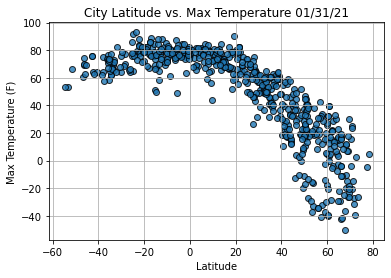

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor='black', linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the outer graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

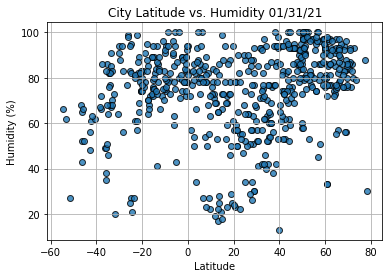

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

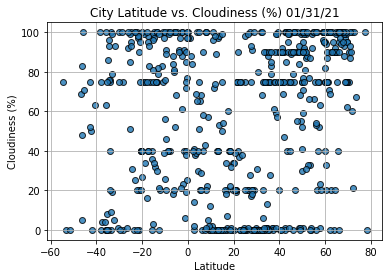

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

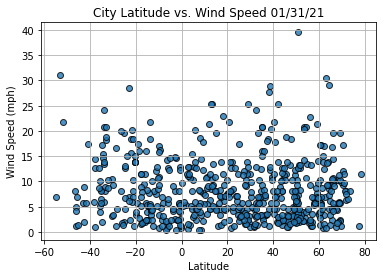

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-61-d58af2435033>, line 3)

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index13 = city_data_df.loc[13]
index13

City              Arraial Do Cabo
Country                        BR
Date          2021-02-01 00:22:31
Lat                      -22.9661
Lng                      -42.0278
Max Temp                    77.45
Humidity                       80
Cloudiness                    100
Wind Speed                   28.5
Name: 13, dtype: object

In [63]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
578     True
579    False
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Komyshnya,UA,2021-02-01 00:26:14,50.1859,33.6840,25.74,97,95,3.38
3,Roald,NO,2021-02-01 00:22:59,62.5833,6.1333,28.40,93,20,6.91
4,Adre,TD,2021-02-01 00:26:14,13.4667,22.2000,65.52,25,0,10.45
8,Kodiak,US,2021-02-01 00:26:15,57.7900,-152.4072,33.80,51,1,5.75
11,Gornopravdinsk,RU,2021-02-01 00:22:09,60.0500,69.9000,4.95,94,95,3.78


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

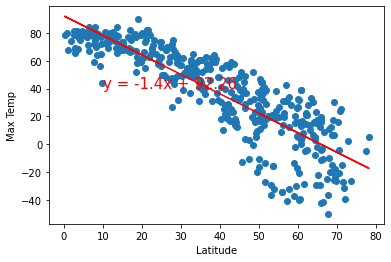

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

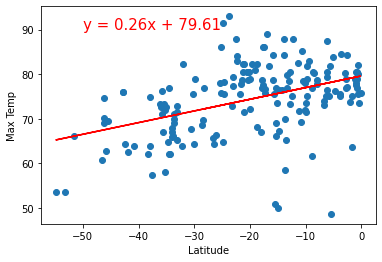

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

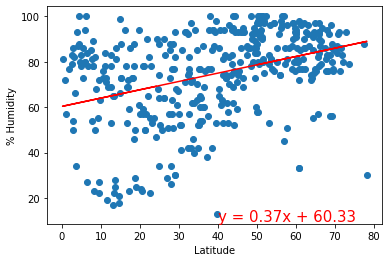

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

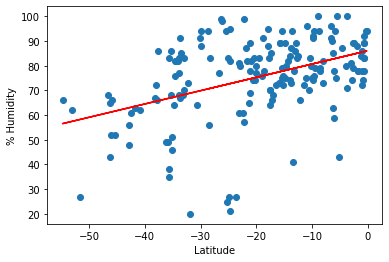

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

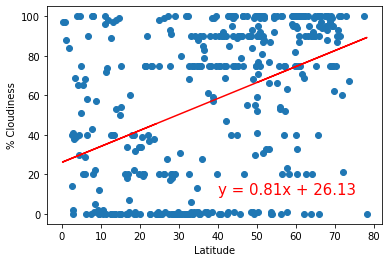

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

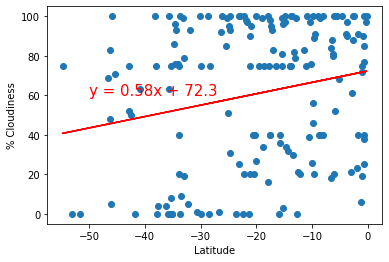

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

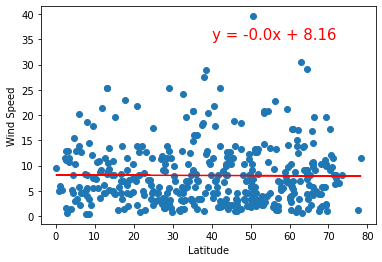

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

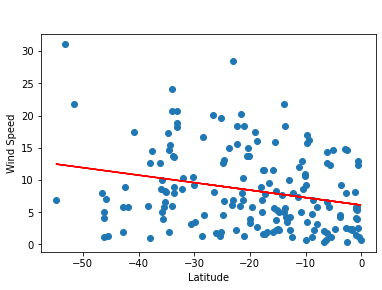

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))